In [6]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm

In [9]:
sns.set()
sdf = pd.read_csv(r"..\ML files\CSV_files\SpotifySongs.csv")

In [10]:
sdf.head() 

,SongName,ArtistName,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,Saiyaan Ji,Yo Yo Honey Singh,62,0.896,0.678,0,-2.546,0,0.0815,0.0137,0.000041,0.1100,0.604,130.024,205450
1,Falling,Trevor Daniel,84,0.785,0.431,10,-8.756,0,0.0364,0.1230,0.000000,0.0887,0.236,127.085,159382
2,Shayad,Pritam,72,0.483,0.468,8,-7.642,1,0.0341,0.7850,0.000000,0.1520,0.319,135.864,247941
3,"Malang (Title Track) [From ""Malang - Unleash T...",Ved Sharma,68,0.384,0.728,7,-6.503,0,0.0623,0.3290,0.000018,0.3290,0.311,156.396,287374
4,Genda Phool (feat. Payal Dev),Badshah,67,0.955,0.538,1,-8.394,1,0.0734,0.1320,0.001460,0.0704,0.837,116.977,170769


In [26]:
#Data Exploration
sdf.info()
sdf.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3731 entries, 0 to 3730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SongName          3731 non-null   object 
 1   ArtistName        3731 non-null   object 
 2   Popularity        3731 non-null   int64  
 3   Danceability      3731 non-null   float64
 4   Energy            3731 non-null   float64
 5   Key               3731 non-null   int64  
 6   Loudness          3731 non-null   float64
 7   Mode              3731 non-null   int64  
 8   Speechiness       3731 non-null   float64
 9   Acousticness      3731 non-null   float64
 10  Instrumentalness  3731 non-null   float64
 11  Liveness          3731 non-null   float64
 12  Valence           3731 non-null   float64
 13  Tempo             3731 non-null   float64
 14  Duration_ms       3731 non-null   int64  
 15  features          3731 non-null   int32  
dtypes: float64(9), int32(1), int64(4), object(

(3731, 16)

In [13]:
sdf.isnull().sum()

SongName            0
ArtistName          0
Popularity          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
dtype: int64

In [14]:
sdf.describe()

,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
count,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000
mean,65.066470,0.605458,0.586561,4.884749,-7.610220,0.584294,0.084800,0.313658,0.076124,0.166752,0.421331,119.273201,205163.264808
std,23.497576,0.156735,0.217523,3.647925,5.043379,0.492909,0.087001,0.308686,0.233818,0.118579,0.226673,28.668209,56522.919213
min,0.000000,0.085800,0.005020,0.000000,-34.991000,0.000000,0.023500,0.000032,0.000000,0.024600,0.034300,49.034000,35240.000000
25%,56.000000,0.510000,0.453000,1.000000,-8.426000,0.000000,0.036150,0.048500,0.000000,0.097200,0.228000,95.865500,177458.000000
50%,73.000000,0.630000,0.628000,5.000000,-6.237000,1.000000,0.047400,0.204000,0.000000,0.118000,0.422000,119.976000,201254.000000
75%,81.000000,0.721000,0.754000,8.000000,-4.884000,1.000000,0.092600,0.536000,0.000268,0.192000,0.603000,139.941000,227633.500000
max,97.000000,0.970000,0.990000,11.000000,-1.190000,1.000000,0.966000,0.993000,0.977000,0.985000,0.969000,205.895000,690732.000000


In [22]:
num_sdf = sdf.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
num_sdf.head()

,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,features
0,62,0.896,0.678,0,-2.546,0,0.0815,0.0137,0.000041,0.1100,0.604,130.024,205450,4
1,84,0.785,0.431,10,-8.756,0,0.0364,0.1230,0.000000,0.0887,0.236,127.085,159382,6
2,72,0.483,0.468,8,-7.642,1,0.0341,0.7850,0.000000,0.1520,0.319,135.864,247941,8
3,68,0.384,0.728,7,-6.503,0,0.0623,0.3290,0.000018,0.3290,0.311,156.396,287374,0
4,67,0.955,0.538,1,-8.394,1,0.0734,0.1320,0.001460,0.0704,0.837,116.977,170769,6


In [17]:
num_sdf.corr()

,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
Popularity,1.000000,0.198960,0.149422,-0.013356,0.251122,0.040163,0.027310,-0.128207,-0.265858,0.019605,0.178178,0.041458,-0.060127
Danceability,0.198960,1.000000,0.382529,0.012047,0.448456,0.005463,0.230617,-0.411463,-0.394008,0.013246,0.539952,-0.011532,-0.053143
Energy,0.149422,0.382529,1.000000,0.040595,0.791162,0.026469,0.174972,-0.753861,-0.542941,0.249692,0.487359,0.146846,0.093955
Key,-0.013356,0.012047,0.040595,1.000000,0.014139,-0.148318,0.041609,-0.032011,-0.018524,0.049617,0.118335,0.010964,0.033647
Loudness,0.251122,0.448456,0.791162,0.014139,1.000000,0.069219,0.128478,-0.637734,-0.813310,0.165054,0.420766,0.169436,0.192612
Mode,0.040163,0.005463,0.026469,-0.148318,0.069219,1.000000,-0.067332,0.028888,-0.069007,0.025554,0.072778,-0.090978,0.068816
Speechiness,0.027310,0.230617,0.174972,0.041609,0.128478,-0.067332,1.000000,-0.154923,-0.127430,0.229058,0.144797,0.080671,-0.055510
Acousticness,-0.128207,-0.411463,-0.753861,-0.032011,-0.637734,0.028888,-0.154923,1.000000,0.483985,-0.190641,-0.359147,-0.174829,-0.055541
Instrumentalness,-0.265858,-0.394008,-0.542941,-0.018524,-0.813310,-0.069007,-0.127430,0.483985,1.000000,-0.108404,-0.341894,-0.164005,-0.186122
Liveness,0.019605,0.013246,0.249692,0.049617,0.165054,0.025554,0.229058,-0.190641,-0.108404,1.000000,0.097669,0.039443,0.048932


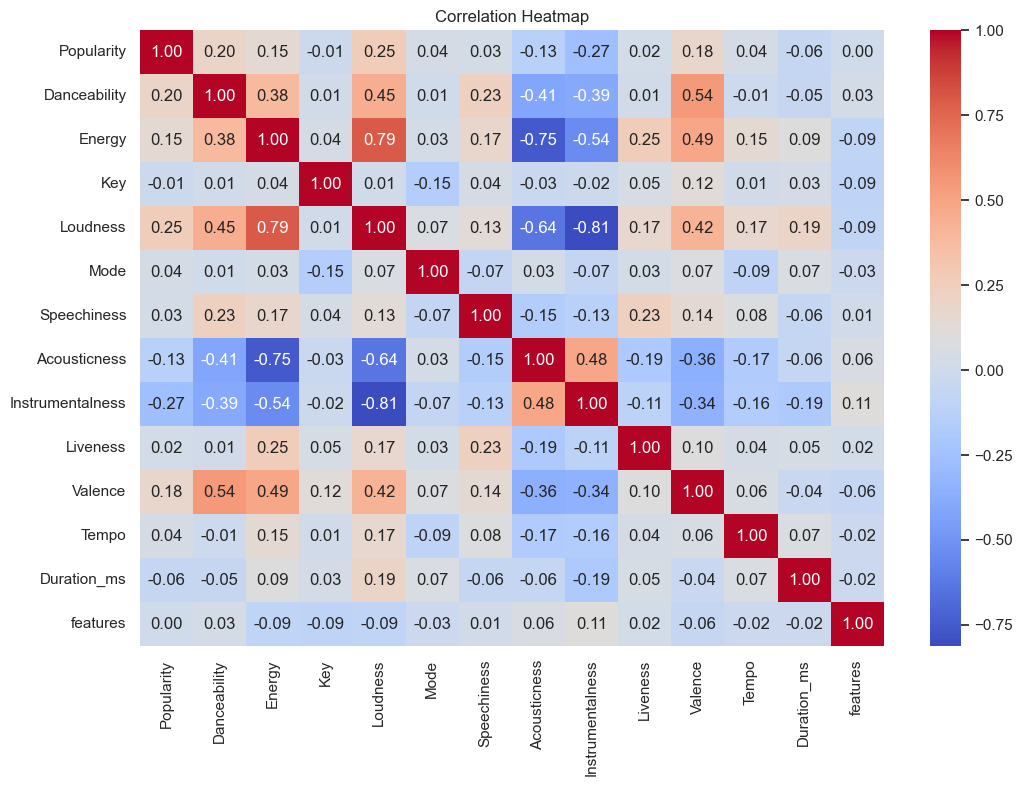

In [23]:
correlation_matrix = num_sdf.corr()

plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [24]:
#Data Transformation: 
# Here basically we are altering the range of the data to fit in a specific range.

from sklearn.preprocessing import MinMaxScaler
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']  # Selecting only numerical columns
normarization = sdf.select_dtypes(include=datatypes)
for col in normarization.columns:
    MinMaxScaler(col)

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
features = kmeans.fit_predict(normarization)
sdf['features'] = features
MinMaxScaler(sdf['features'])

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


MinMaxScaler(feature_range=0       1
1       2
2       8
3       6
4       2
       ..
3726    2
3727    9
3728    3
3729    8
3730    8
Name: features, Length: 3731, dtype: int32)

In [51]:
normarization.head()

,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,features
0,62,0.896,0.678,0,-2.546,0,0.0815,0.0137,0.000041,0.1100,0.604,130.024,205450,4
1,84,0.785,0.431,10,-8.756,0,0.0364,0.1230,0.000000,0.0887,0.236,127.085,159382,6
2,72,0.483,0.468,8,-7.642,1,0.0341,0.7850,0.000000,0.1520,0.319,135.864,247941,8
3,68,0.384,0.728,7,-6.503,0,0.0623,0.3290,0.000018,0.3290,0.311,156.396,287374,0
4,67,0.955,0.538,1,-8.394,1,0.0734,0.1320,0.001460,0.0704,0.837,116.977,170769,6


In [46]:
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, amount=1):
        distance = []
        song = self.dataset[(self.dataset.SongName.str.lower() == songs.lower())].head(1).values[0]
        rec = self.dataset[self.dataset.SongName.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 1 ]:
                    d = d + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(d)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['ArtistName', 'SongName']
        return rec[columns][:amount]

In [50]:
recommendations = Spotify_Recommendation(sdf)
recommendations.recommend(input("song name : "), 10)



100%|██████████| 3730/3730 [00:00<00:00, 38329.30it/s]
C:\Users\Asus\AppData\Local\Temp\ipykernel_15096\1864863660.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['distance'] = distance


,ArtistName,SongName
1722,Bebe Rexha,Break My Heart Myself (feat. Travis Barker)
2661,Pop Smoke,Dior
1390,Coldplay,Higher Power
1422,Olivia Rodrigo,"The Rose Song - From ""High School Musical: The..."
1642,Juice WRLD,Come & Go (with Marshmello)
1423,Olivia Rodrigo,good 4 u
1641,Lewis Capaldi,Before You Go
1814,Justin Bieber,Lonely (with benny blanco)
2876,XXXTENTACION,SAD!
3521,Astrud Gilberto,The Gentle Rain - RJD2 Remix
